<a href="https://colab.research.google.com/github/Nokondi/AI-ML-Training-Code/blob/main/Breadth_First_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breadth-First Search
Breadth-first search (BFS) is a simple, uninformed AI search algorithm. The algorithm utilizes a single-agent approach to scan an unknown, partially observable environment to find a path from a starting point to an end point.

To demonstrate, let's assume that our AI agent is an adventurer looking for a path through an unexplored dungeon. The agent has no map to rely on to help them navigate: all they know is that they are looking for a treasure that is in a specific room of the dungeon, and they'll only know that they've arrived at the correct room when they find the treasure. We'll use the following dungeon map as the environment for our agent:

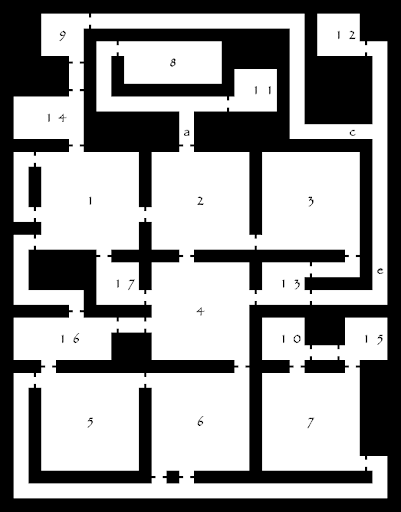

*Map generated by [Donjon](https://donjon.bin.sh/fantasy/dungeon/)*

Let's assume that the entrance to the dungeon drops the agent in room 1, and that the treasure is in room 15. The only other rooms the agent is able to observe are ones that connect to the room they are currently in. To aid in their exploration, our agent can keep track of each room they have previously visited as well as each room that connects to rooms they have visited. We can represent these connections as a graph:

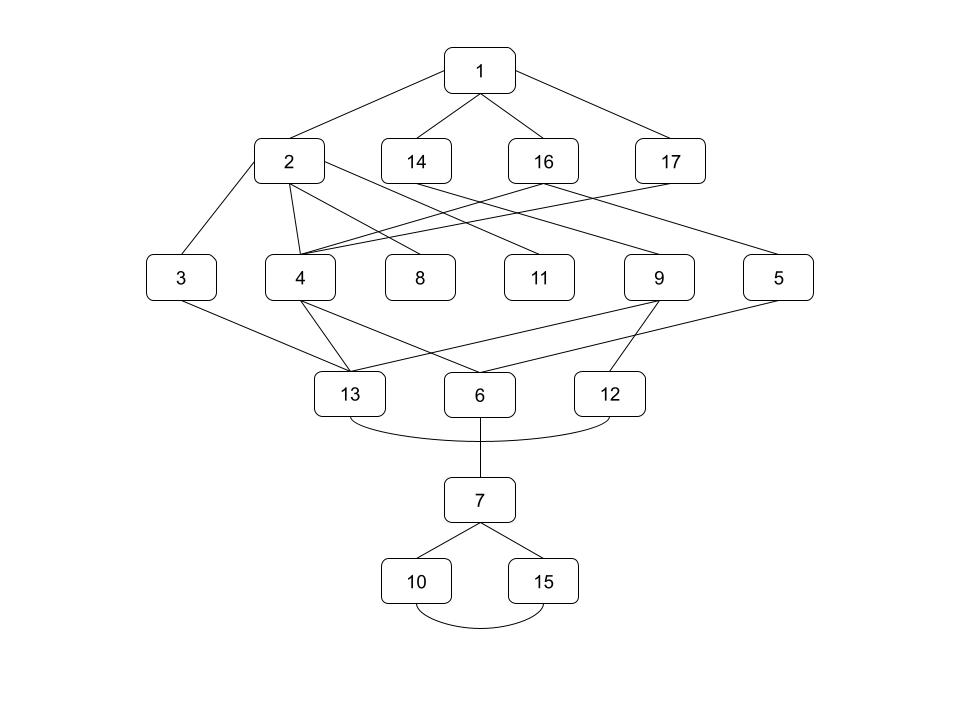

Each node in the graph represents a room in our dungeon and each connecting line represents a door or hallway from one room to another. We can create a simple version of this graph in Python by creating a dictionary of lists, where each key is a room, and each value is a list of all the connected rooms. This will be much easier for our AI to understand and explore.

In [ ]:
graph = {
  '1': ['2','14','16','17'],
  '2': ['1', '3','4','8','11'],
  '14': ['1', '9'],
  '16': ['1', '4','5'],
  '17': ['1', '4'],
  '3': ['2', '13'],
  '4': ['2', '16', '17', '13', '6'],
  '8': ['2'],
  '11': ['2'],
  '9': ['14', '12','13'],
  '5': ['16', '6'],
  '13': ['3', '4', '9'],
  '6': ['4', '5', '7'],
  '12': ['9'],
  '7': ['6', '10','15'],
  '10': ['7', '15'],
  '15':['7', '10']
}

The BFS algorithm requires our agent to keep track of rooms that we have visited and rooms that we have seen but have not yet visited. They will use each of these lists to determine their path through the dungeon. As they travel from room to room, these lists will change as they learn more about the layout of the dungeon. In this way, our agent will "learn" the layout of the dungeon as it travels through.

Here is the breadth-first search algorithm written in common English:

1.   Create a list for rooms we have visited and another for rooms we have seen.
2.   Add the starting room to the list of rooms seen.
3.   Go to the first room on the "seen" list. 
4.   Check if this room is the goal room. If it is, the algorithm is completed; if not, continue to the next step.
5.   Remove the first room from the "seen" list and add it to the "visited" list.
6.   Add all rooms connected to the above room that are not already on the "visited" list to the "seen" list.
7.   Repeat, starting at step 3.

If our imaginary adventurer follows the algorithm, it might look something like this: [Video link](https://drive.google.com/file/d/11uu8ylU92wz8ndSHEIWW1BwqcoKx01Zk/view?usp=share_link)


We can translate this algorithm to Python and store it as a function. Here's one example of how that code might look:

In [ ]:
def BFS(graph, start, goal): 
  visited = []
  seen = [start]
  while seen:                        # Loop until queue is empty
    m = seen.pop(0)                  # Take first element from queue
    visited.append(m)                # Add to solution list
    if m == goal:
      return visited                 # return solution list if we reach goal
    for neighbor in graph[m]:
      if neighbor not in visited and neighbor not in seen:    # Check each neighbor node
        seen.append(neighbor)
  return None                        # return None if goal node is unreachable

We can see the results of this search by executing the BFS function and passing in the graph and a start and end node as arguments.

In [ ]:
print(BFS(graph, '1', '15'))

['1', '2', '14', '16', '17', '3', '4', '8', '11', '9', '5', '13', '6', '12', '7', '10', '15']


You can test this out with any starting node and any end node, and the agent will attempt to find a path between them. This is obviously not an optimal solution as it requires the agent to pass through every room that they see until they reach their goal. Check out [this A* Search code](https://colab.research.google.com/drive/1BTe6sY8JS3zm0xxxtTVnQA5R0bKP7ALL?usp=sharing) for a solution that uses a heuristic formula to attempt to find the quickest path through the dungeon.